<a href="https://colab.research.google.com/github/harshsaini1129/Data-Science/blob/main/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [ ]:
data=pd.read_csv('/content/sales.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86135 entries, 0 to 86134
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USERID      86135 non-null  int64  
 1   ORDERDATE   86133 non-null  object 
 2   ORDERID     86135 non-null  int64  
 3   AMOUNTINFO  86127 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ MB


In [ ]:
data.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,142074,2016-01-01,4196439032,9399.0
1,56927,2016-01-01,4198324983,8799.0
2,87058,2016-01-01,4191287379,6899.0
3,136104,2016-01-01,4198508313,5999.0
4,117831,2016-01-01,4202238313,5399.0


In [ ]:
#FUNCTION TO DETECT OUTLIERS IN 2D DATASETS
def find_anomalies(data):
   #define a list to accumulate anomalies
   anomalies =[]
   #Set upper and lower limits to 3 standard deviations
   random_data_std = statistics.stdev(data)
   random_data_mean = statistics.mean(data)
   # 3 standard deviations

   anamoly_cut_off =random_data_std*3

   lower_limit = random_data_mean -anamoly_cut_off  # u-3sigma
   upper_limit = random_data_mean + anamoly_cut_off

   #Generate oyutliers
   for outlier in data :
     if outlier >upper_limit or outlier <lower_limit :
          anomalies.append(outlier)
   return anomalies






In [ ]:
data.ORDERID


,ORDERID
0,4196439032
1,4198324983
2,4191287379
3,4198508313
4,4202238313
...,...
86130,4111876729
86131,4182928398
86132,4080138429
86133,4193916074


In [ ]:
list_1 = find_anomalies(data['ORDERID'])
len(list_1)


2289

In [ ]:
len(data)

86135

In [ ]:
print (2289/86135)

0.02657456318569687


In [ ]:
data.ORDERID .skew()

np.float64(-3.9800889020853703)

In [ ]:
import seaborn as sns

<Axes: xlabel='ORDERID', ylabel='Density'>

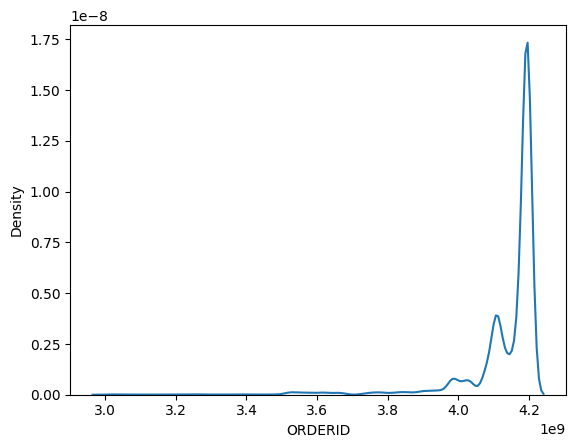

In [ ]:
sns.kdeplot(data.ORDERID)

In [ ]:
data['ORDERID_transformed'] =np.log(data.ORDERID)

In [ ]:
data.ORDERID_transformed.skew()

np.float64(-4.330636023348883)

In [ ]:
list_2 = find_anomalies(data.ORDERID_transformed)
len(list_2)

2205

<Axes: xlabel='ORDERID_transformed', ylabel='Density'>

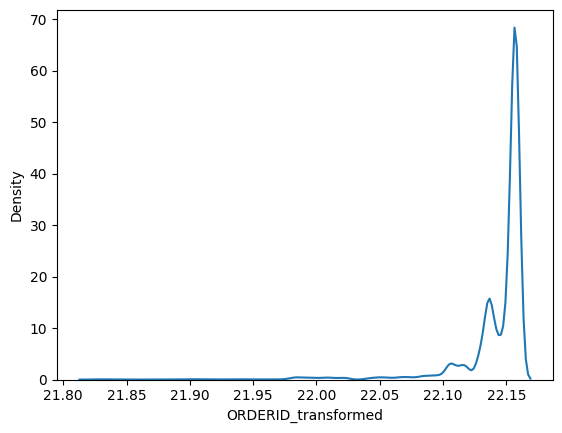

In [ ]:
sns.kdeplot(data.ORDERID_transformed)

our aim is to bring the data close to normal distribution thats why we are using
data['ORDERID_transformed'] =np.log(data.ORDERID)

BOXPLOT
 IT IS VISUAL WAY OF UNDERSTANDING THE OUTLIERS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<Axes: >

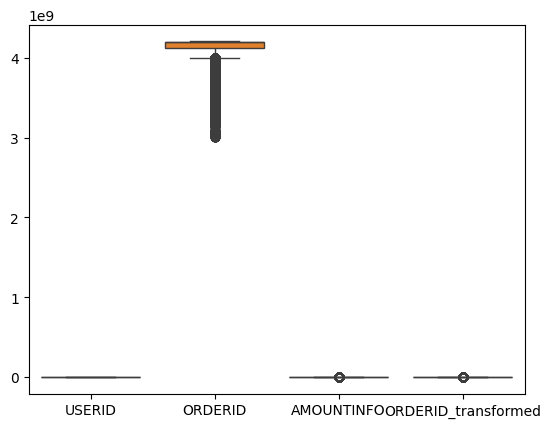

In [ ]:
sns.boxplot(data=data)

In [ ]:
df =pd.DataFrame(data)
len(df)

86135

In [ ]:
df

,USERID,ORDERDATE,ORDERID,AMOUNTINFO,ORDERID_transformed
0,142074,2016-01-01,4196439032,9399.0,22.157502
1,56927,2016-01-01,4198324983,8799.0,22.157951
2,87058,2016-01-01,4191287379,6899.0,22.156274
3,136104,2016-01-01,4198508313,5999.0,22.157995
4,117831,2016-01-01,4202238313,5399.0,22.158883
...,...,...,...,...,...
86130,110416,2016-12-29,4111876729,3.9,22.137145
86131,149172,2016-12-29,4182928398,0.5,22.154277
86132,58525,2016-12-29,4080138429,0.5,22.129397
86133,161732,2016-12-29,4193916074,0.5,22.156901


In [ ]:
df.describe()

,USERID,ORDERID,AMOUNTINFO,ORDERID_transformed
count,86135.000000,8.613500e+04,86127.000000,86135.000000
mean,108059.642782,4.137051e+09,744.705249,22.142760
std,32866.109087,1.238664e+08,1425.211176,0.032002
min,51220.000000,3.002478e+09,0.500000,21.822704
25%,79565.500000,4.114637e+09,13.000000,22.137817
50%,108072.000000,4.190615e+09,59.000000,22.156113
75%,136378.000000,4.196161e+09,629.000000,22.157436
max,165100.000000,4.203330e+09,30999.000000,22.159143


INTER QUARTILE RANGE  IQR =Q3 -Q1

In [ ]:
list1=[43,54,56,61,62,66,68,69,69,70,71,72,77,78,79,85,87,88,89,93,95,96,98,99,99]

In [ ]:
len(list1)

25

In [ ]:
max(list1)

99

In [ ]:
min(list1)

43

In [ ]:
import statistics
statistics.mean(list1)

76.96

In [ ]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

to find 90  percentile of data
multiply 90% with total no of score (25) . round of the result
0.90*25 =22.5 eq to 23

so 23rd element is my 90 th percentile for this data set

same for 25 percentile
